In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('StudentPerformanceFactors.csv')


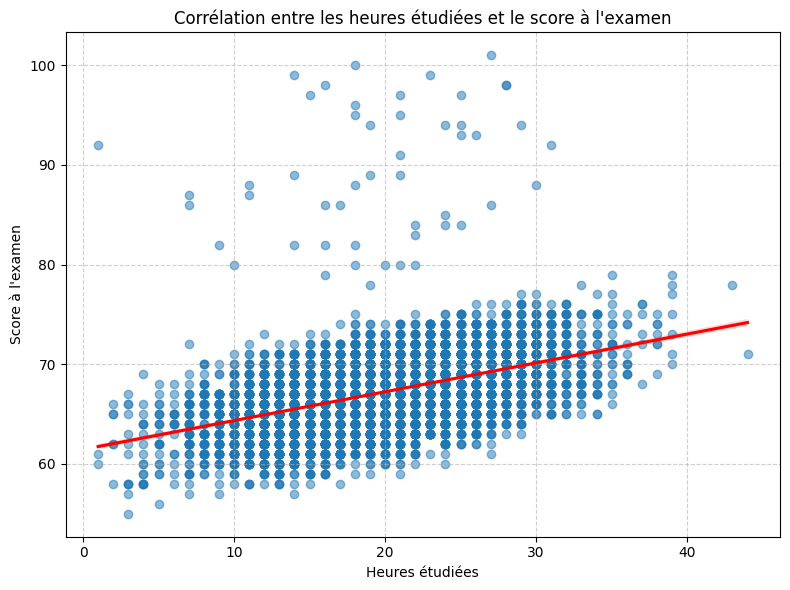

In [ ]:
#Storytelling visuel par thème
#Correlation entre les heures étudiées et le score à l'examen
plt.figure(figsize=(8, 6))
sns.regplot(
    x='Hours_Studied',
    y='Exam_Score',
    data=df,
    scatter_kws={'alpha': 0.5},  # transparence des points
    line_kws={'color': 'red'},   # couleur de la droite
    ci=95
)

# Titres et axes
plt.title('Corrélation entre les heures étudiées et le score à l\'examen')
plt.xlabel('Heures étudiées')
plt.ylabel('Score à l\'examen')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()

# Affichage du graphique
plt.show()





C:\Users\user\AppData\Local\Temp\ipykernel_14064\3465205716.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Attendance_Level', y='Exam_Score', data=df, palette='Set3')


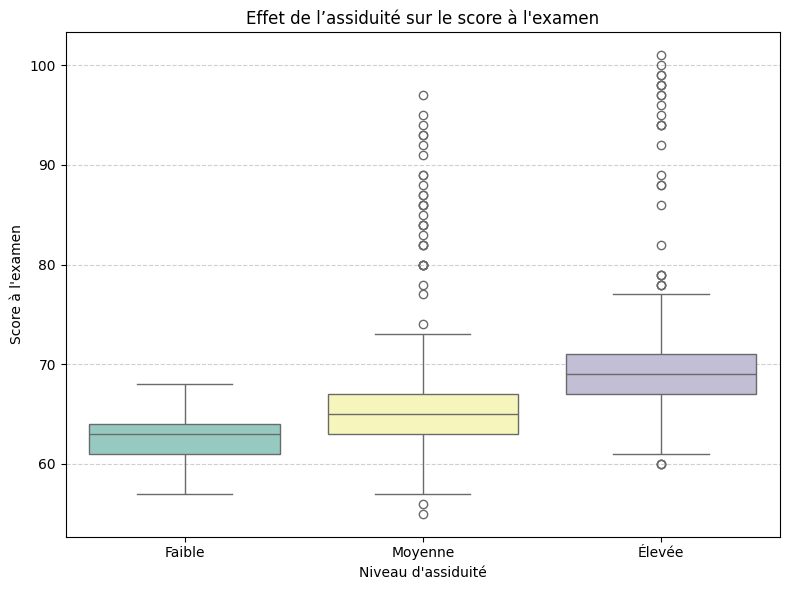

In [15]:


# Créer des tranches d'assiduité
bins = [0, 60, 80, 100]
labels = ['Faible', 'Moyenne', 'Élevée']
df['Attendance_Level'] = pd.cut(df['Attendance'], bins=bins, labels=labels, right=True)

# Visualisation : boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Attendance_Level', y='Exam_Score', data=df, palette='Set3')

# Titres et axes
plt.title('Effet de l’assiduité sur le score à l\'examen')
plt.xlabel('Niveau d\'assiduité')
plt.ylabel('Score à l\'examen')
plt.grid(True, axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()


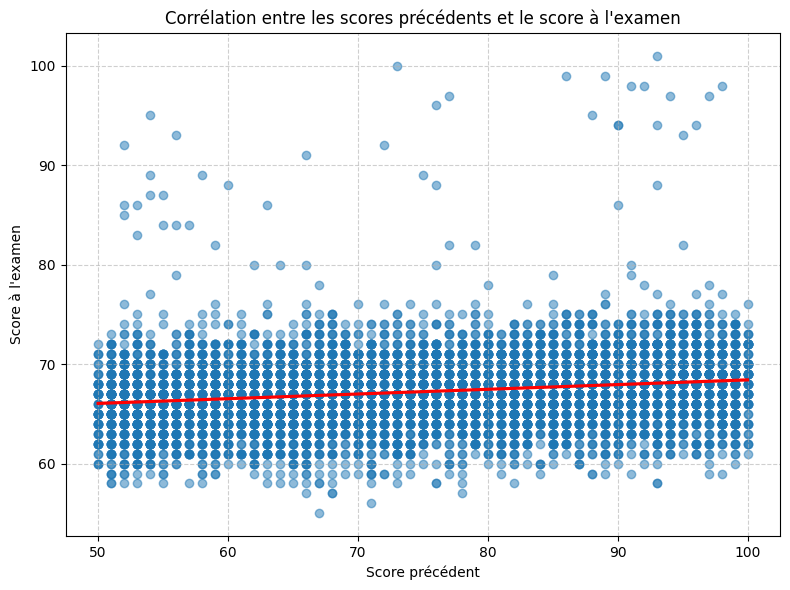

In [16]:

plt.figure(figsize=(8, 6))
sns.regplot(
    x='Previous_Scores',
    y='Exam_Score',
    data=df,
    scatter_kws={'alpha': 0.5},
    line_kws={'color': 'red'},
    ci=95
)

plt.title('Corrélation entre les scores précédents et le score à l\'examen')
plt.xlabel('Score précédent')
plt.ylabel('Score à l\'examen')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


C:\Users\user\AppData\Local\Temp\ipykernel_14064\1380073023.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


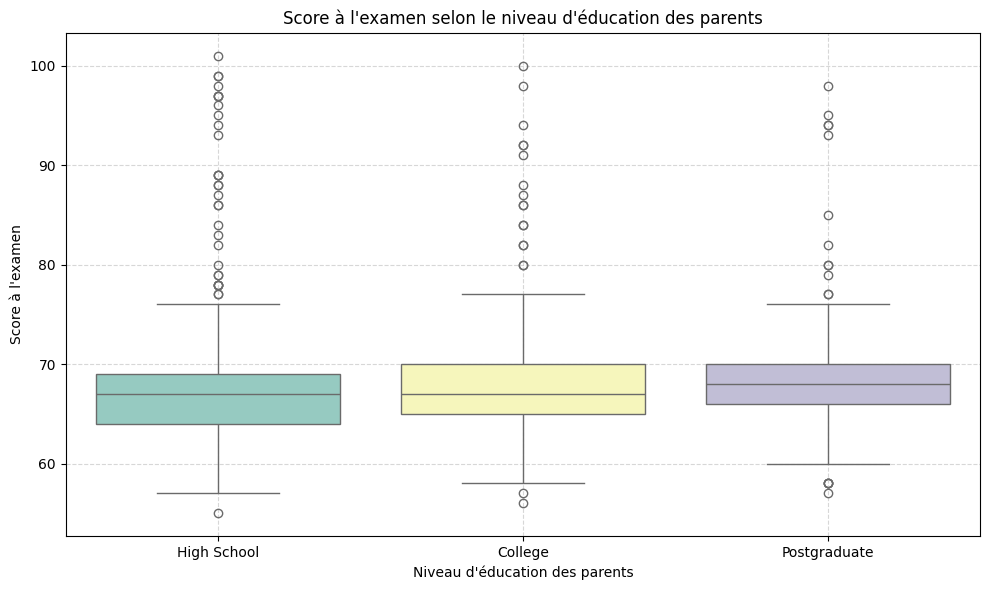

In [ ]:
#Facteurs familiaux et socio-économiques
plt.figure(figsize=(10, 6))
sns.boxplot(
    x='Parental_Education_Level',
    y='Exam_Score',
    data=df,
    palette='Set3'
)

plt.title('Score à l\'examen selon le niveau d\'éducation des parents')
plt.xlabel('Niveau d\'éducation des parents')
plt.ylabel('Score à l\'examen')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()



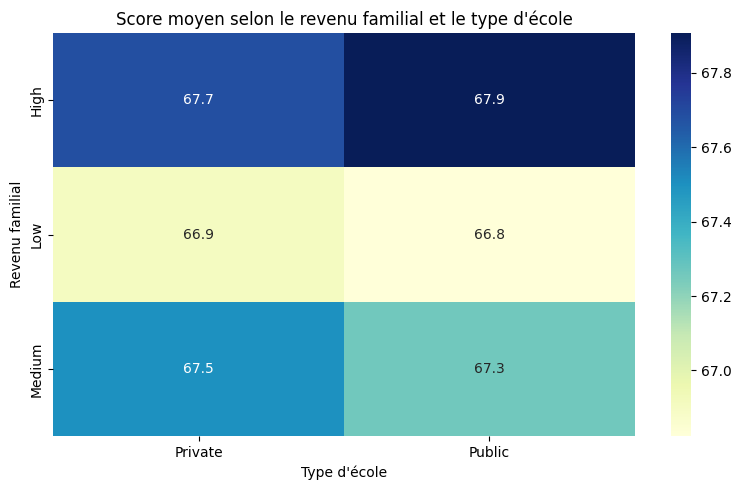

In [ ]:

pivot_data = df.pivot_table(
    values='Exam_Score',
    index='Family_Income',
    columns='School_Type',
    aggfunc='mean'
)

plt.figure(figsize=(8, 5))
sns.heatmap(
    pivot_data,
    annot=True,
    cmap='YlGnBu',
    fmt=".1f"
)

plt.title('Score moyen selon le revenu familial et le type d\'école')
plt.xlabel('Type d\'école')
plt.ylabel('Revenu familial')
plt.tight_layout()
plt.show()


C:\Users\user\AppData\Local\Temp\ipykernel_14064\100117047.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(
C:\Users\user\AppData\Local\Temp\ipykernel_14064\100117047.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


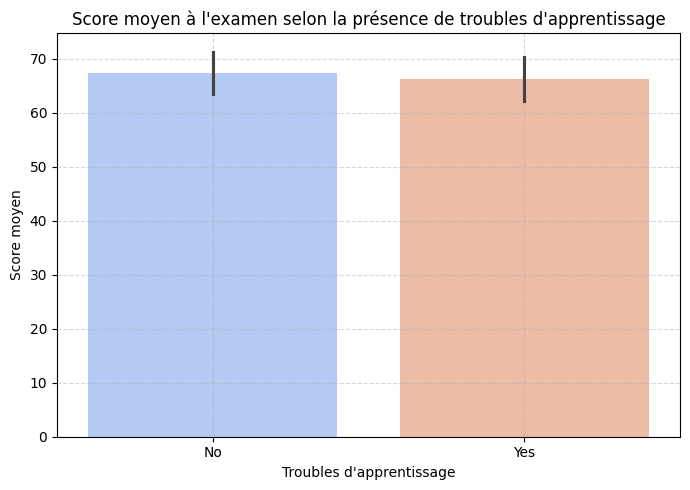

In [21]:
plt.figure(figsize=(7, 5))
sns.barplot(
    x='Learning_Disabilities',
    y='Exam_Score',
    data=df,
    estimator='mean',
    ci='sd',
    palette='coolwarm'
)
plt.title('Score moyen à l\'examen selon la présence de troubles d\'apprentissage')
plt.xlabel('Troubles d\'apprentissage')
plt.ylabel('Score moyen')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


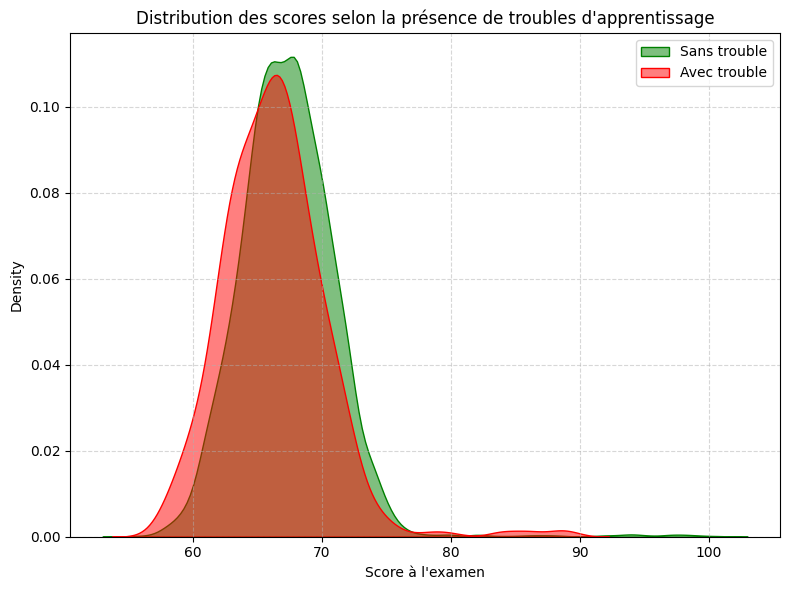

In [22]:
plt.figure(figsize=(8, 6))
sns.kdeplot(
    data=df[df['Learning_Disabilities'] == 'No'],
    x='Exam_Score',
    label='Sans trouble',
    fill=True,
    alpha=0.5,
    color='green'
)
sns.kdeplot(
    data=df[df['Learning_Disabilities'] == 'Yes'],
    x='Exam_Score',
    label='Avec trouble',
    fill=True,
    alpha=0.5,
    color='red'
)
plt.title('Distribution des scores selon la présence de troubles d\'apprentissage')
plt.xlabel('Score à l\'examen')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


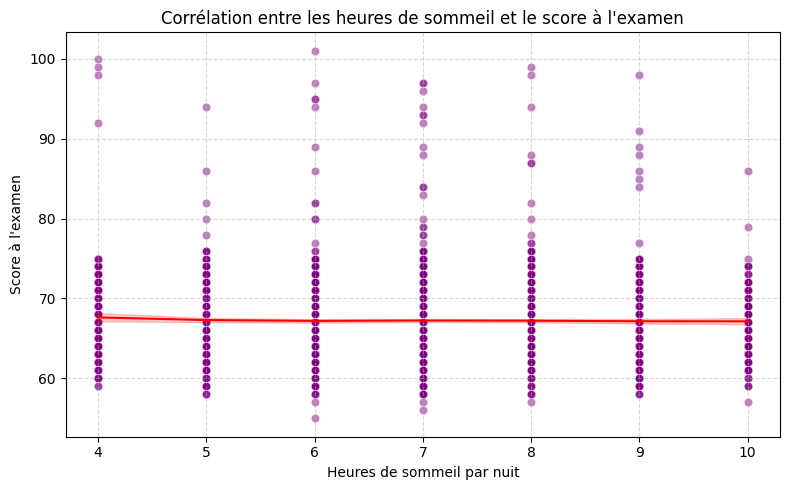

In [24]:
plt.figure(figsize=(8, 5))
sns.scatterplot(
    x='Sleep_Hours',
    y='Exam_Score',
    data=df,
    alpha=0.5,
    color='purple'
)
sns.lineplot(
    x='Sleep_Hours',
    y='Exam_Score',
    data=df,
    color='red',
    estimator='mean'
)
plt.title('Corrélation entre les heures de sommeil et le score à l\'examen')
plt.xlabel('Heures de sommeil par nuit')
plt.ylabel('Score à l\'examen')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()



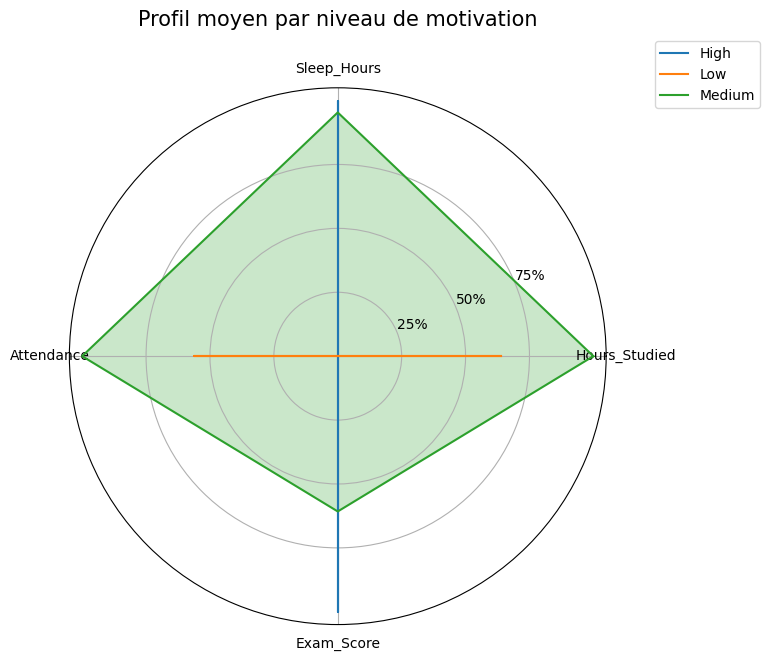

In [ ]:
import numpy as np
motivation_profile = df.groupby('Motivation_Level')[['Hours_Studied', 'Sleep_Hours', 'Attendance', 'Exam_Score']].mean()


motivation_profile_norm = (motivation_profile - motivation_profile.min()) / (motivation_profile.max() - motivation_profile.min())

labels = motivation_profile_norm.columns.tolist()
num_vars = len(labels)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# Tracé pour chaque niveau de motivation
for index, row in motivation_profile_norm.iterrows():
    values = row.tolist()
    values += values[:1]  # Fermer le polygone
    ax.plot(angles, values, label=index)
    ax.fill(angles, values, alpha=0.25)

# Configuration des axes
ax.set_title("Profil moyen par niveau de motivation", size=15, y=1.1)
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)
ax.set_yticks([0.25, 0.5, 0.75])
ax.set_yticklabels(["25%", "50%", "75%"])
ax.grid(True)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))

plt.tight_layout()
plt.show()